# Example: Tree method for Spam data

#http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/

#spam <- read.table(file= "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",
                   sep = ",")

In [96]:
## read the data from given URL
import pandas as pd
import numpy as np


url_spam = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
spam = pd.read_csv(url_spam,header=None)

# url_test = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/vowel.test.csv"
# vowel_test = pd.read_csv(url_test)

# vowel_train.head()

In [97]:
spam.shape

(4601, 58)

In [98]:
spam.size

266858

In [99]:
np.shape(spam)

(4601, 58)

In [100]:
len(spam)

4601

In [101]:
type(spam)

pandas.core.frame.DataFrame

## Sample from data set and Split it into train and test

In [136]:
import random
random.seed(123)

In [137]:
# flag =spam.sample(1536, replace=False, random_state=123, axis = 0)
# flag

In [138]:
from random import sample
random.seed(123)
flag = np.sort(sample(range(4601), 1536))
flag

array([   2,    6,    9, ..., 4595, 4599, 4600])

In [139]:
spam_test = spam.iloc[flag, :].copy()
spam_test.shape

(1536, 58)

In [140]:
spam_train = spam.drop(flag) #drop the best!!!!
spam_train.shape

(3065, 58)

In [ ]:
# train=df.sample(frac=0.8,random_state=200) #random state is a seed value
# test=df.drop(train.index)

In [126]:
#####  find the difference between 2 dfs
# spam_train = pd.concat([spam,spam_test]).drop_duplicates(keep=False) #drop more than necessary
# spam_train.head()

In [127]:
# spam_train.shape #should be 4601-1536=3065

In [128]:
# m = spam.merge(spam_test, how='outer', suffixes=['', '_'], indicator=True)
# m

In [129]:
# spam_train = spam.merge(spam_test, indicator = True, how='left').loc[lambda x : x['_merge']!='both']
# # spam_train

In [130]:
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
# equals to train_test_split
# df = pd.DataFrame(np.random.randn(100, 2))
# df
# In [11]: df = pd.DataFrame(np.random.randn(100, 2))

# In [12]: msk = np.random.rand(len(df)) < 0.8

# In [13]: train = df[msk]

# In [14]: test = df[~msk]

In [142]:
len(spam_test[spam_test.iloc[:,57]==1])

602

In [146]:
y1 = spam_train.iloc[:,57]
y2 = spam_test.iloc[:,57]

# CART, using rpart package

# Example: ## Fisher's Iris Dat, made up of 150 obs. 
        belonging to 3 different classes
 

In [147]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [149]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [150]:
decision_tree = DecisionTreeClassifier(random_state = 0, max_depth = 2)

In [153]:
decision_tree = decision_tree.fit(iris.data, iris.target)
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [156]:
#Alternatively, the tree can also be exported in textual format with the function export_text. 
#This method doesn’t require the installation of external libraries and is more compact:
r = export_text(decision_tree, feature_names = iris['feature_names'])
r

'|--- petal width (cm) <= 0.80\n|   |--- class: 0\n|--- petal width (cm) >  0.80\n|   |--- petal width (cm) <= 1.75\n|   |   |--- class: 1\n|   |--- petal width (cm) >  1.75\n|   |   |--- class: 2\n'

In [157]:
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [180]:
# if you wanna a figure plot
from sklearn.datasets import load_iris
from sklearn import tree
X,y = load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

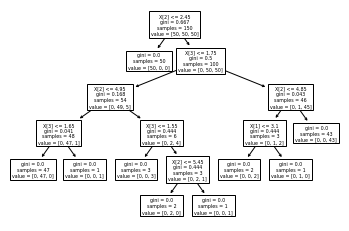

In [181]:
#Once trained, you can plot the tree with the plot_tree function:
tree.plot_tree(clf)

We can also export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with conda install python-graphviz.

Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with pip install graphviz.

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf:

In [193]:
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/tianh/Anaconda3/Lib/site-packages/graphviz'
import graphviz

In [194]:
dot_data =tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("iris")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

## Prune the tree
 pruning the tree using max_depth may give us any better results. 
 check https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752
 
  a simple function is created to run our model using different values for max_depth (from 1 to 30) and visualize its results to see how the accuracy differs for each value.

In [188]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,  
                   class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Adaboost Classifier in Python
In recent years, boosting algorithms gained massive popularity in data science or machine learning competitions. Most of the winners of these competitions use boosting algorithms to achieve high accuracy. These Data science competitions provide the global platform for learning, exploring and providing solutions for various business and government problems. Boosting algorithms combine multiple low accuracy(or weak) models to create a high accuracy(or strong) models. It can be utilized in various domains such as credit, insurance, marketing, and sales. Boosting algorithms such as AdaBoost, Gradient Boosting, and XGBoost are widely used machine learning algorithm to win the data science competitions. 

In [161]:
# load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split (has been renamed)
from sklearn import metrics

In [162]:
#loading dataset
iris = datasets.load_iris()
X= iris.data
y = iris.target

In [163]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [166]:
#Build the adaboost classifier object
abc = AdaBoostClassifier(n_estimators = 50,
                       learning_rate = 1)
#train Adaboost classifier
model = abc.fit(X_train, y_train)

#preidct the presense for the test dataset
y_pred = model.predict(X_test)

In [167]:
model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

### "The most important parameters are base_estimator, n_estimators, and learning_rate." (Adaboost Classifier, Chris Albon)

base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

n_estimators: Number of weak learners to train iteratively.

learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [169]:
y_pred

array([2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       0])

In [170]:
#evaluate model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


## using different base learners
the abouve defoult is Decsion Tree, in the following, we use the SVC as example

In [172]:
#load libraries
from sklearn.ensemble import AdaBoostClassifier

#imort SVC
from sklearn.svm import SVC
from sklearn import metrics #for accuracy calculation
svc = SVC(probability = True, kernel = "linear")

#crear adaboost classifer object
abc = AdaBoostClassifier(n_estimators =50, base_estimator = svc, learning_rate = 1)

#traning adaboost classifier
model = abc.fit(X_train, y_train)

#predict the response for test dataset
y_pred = model.predict(X_test)

#model evaluation: accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [173]:
# In this case, SVC Base Estimator is getting worse accuracy then Decision tree Base Estimator.

## Pros
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

## Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5) # try to use cross_val_score, very useful!!
scores.mean()

0.9466666666666665

In [196]:
scores

array([0.96666667, 0.93333333, 0.93333333, 0.9       , 1.        ])